<a href="https://colab.research.google.com/github/navirom19/Python-Projects/blob/main/Covid_19_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid - 19 Data Analysis Project:**

**Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1). Import the dataset using Pandas from above mentioned url.

In [ ]:
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)

## 2). High Level Data Understanding:

In [ ]:
# A. Find no. of rows & columns in the dataset
print("Number of rows and columns:", df.shape)

Number of rows and columns: (57394, 49)


In [ ]:
# B. Data types of columns
print("Data types of columns:\n", df.dtypes)

Data types of columns:
 iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu

In [ ]:
# C. Info and describe
print("Info:\n", df.info())
print("Describe:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

## 3). Low Level Data Understanding :

In [ ]:
# A. Count of unique values in 'location' column
print("Unique values in 'location':", df['location'].nunique())

Unique values in 'location': 216


In [ ]:
# B. Continent with maximum frequency
print("Continent with maximum frequency:\n", df['continent'].value_counts().idxmax())

Continent with maximum frequency:
 Europe


In [ ]:
# C. Maximum and mean value in 'total_cases'
print("Max 'total_cases':", df['total_cases'].max())
print("Mean 'total_cases':", df['total_cases'].mean())

Max 'total_cases': 55154651.0
Mean 'total_cases': 167797.3688753302


In [ ]:
# D. 25%, 50%, 75% quartile values in 'total_deaths'
print("Quartiles for 'total_deaths':\n", df['total_deaths'].quantile([0.25, 0.50, 0.75]))

Quartiles for 'total_deaths':
 0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


In [ ]:
# E. Continent with maximum 'human_development_index'
print("Continent with max HDI:", df.groupby('continent')['human_development_index'].max().idxmax())

Continent with max HDI: Europe


In [ ]:
# F. Continent with minimum 'gdp_per_capita'
print("Continent with min GDP per capita:", df.groupby('continent')['gdp_per_capita'].min().idxmin())

Continent with min GDP per capita: Africa


4. Filter the dataframe with only this columns

In [ ]:
columns_to_keep = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
df = df[columns_to_keep]

## 5). Data Cleaning

In [ ]:
# A. Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# B. Find missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 continent                  0
location                   0
date                       0
total_cases                0
total_deaths               0
gdp_per_capita             0
human_development_index    0
dtype: int64


In [ ]:
# C. Remove rows where 'continent' is missing
df.dropna(subset=['continent'], inplace=True)

In [ ]:
# D. Fill missing values with 0
df.fillna(0, inplace=True)
df.isnull().sum()

,0
continent,0
location,0
date,0
total_cases,0
total_deaths,0
gdp_per_capita,0
human_development_index,0


## 6). DateTime Format

In [ ]:
# A. Convert 'date' column to datetime
# Check the 'date' column
print("Original 'date' column:\n", df['date'].head())

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

Original 'date' column:
 0   2019-12-31
1   2020-01-01
2   2020-02-01
3   2020-03-01
4   2020-04-01
Name: date, dtype: datetime64[ns]


In [ ]:
# B. Extract month and create new column
# Extract month and create new column
df['month'] = df['date'].dt.month

# Display the updated DataFrame
print("Updated DataFrame with 'month' column:\n", df[['date', 'month']].head())

Updated DataFrame with 'month' column:
         date  month
0 2019-12-31     12
1 2020-01-01      1
2 2020-02-01      2
3 2020-03-01      3
4 2020-04-01      4


## 8). Data Aggregation

In [ ]:
# A. Group by 'continent' and find max values
df.groupby('continent').max().reset_index()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


In [ ]:
# B. Save the result in a new dataframe
df_groupby = df.groupby('continent').max().reset_index()
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


## 9). Feature Engineering

In [ ]:
# Create new feature 'total_deaths_to_total_cases'
df_groupby["total_deaths_to_total_cases"]=df_groupby["total_deaths"]/df_groupby["total_cases"]
df_groupby["total_deaths_to_total_cases"]*100

,total_deaths_to_total_cases
0,2.700364
1,1.470754
2,2.618830
3,2.206241
4,3.268468
5,2.825066


## 10). Data Visualization

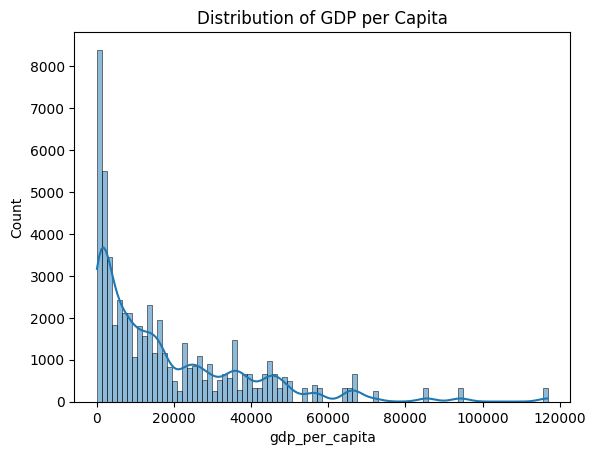

In [ ]:
# A. Univariate analysis on 'gdp_per_capita'
sns.histplot(df['gdp_per_capita'], kde=True)
plt.title("Distribution of GDP per Capita")
plt.show()

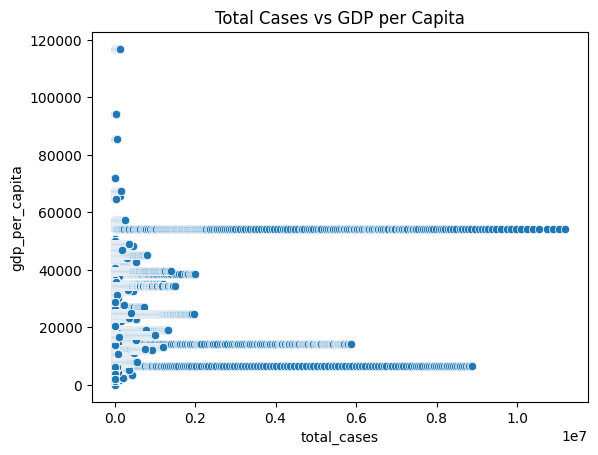

In [ ]:
# B. Scatter plot of 'total_cases' vs 'gdp_per_capita'
sns.scatterplot(x='total_cases', y='gdp_per_capita', data=df)
plt.title("Total Cases vs GDP per Capita")
plt.show()

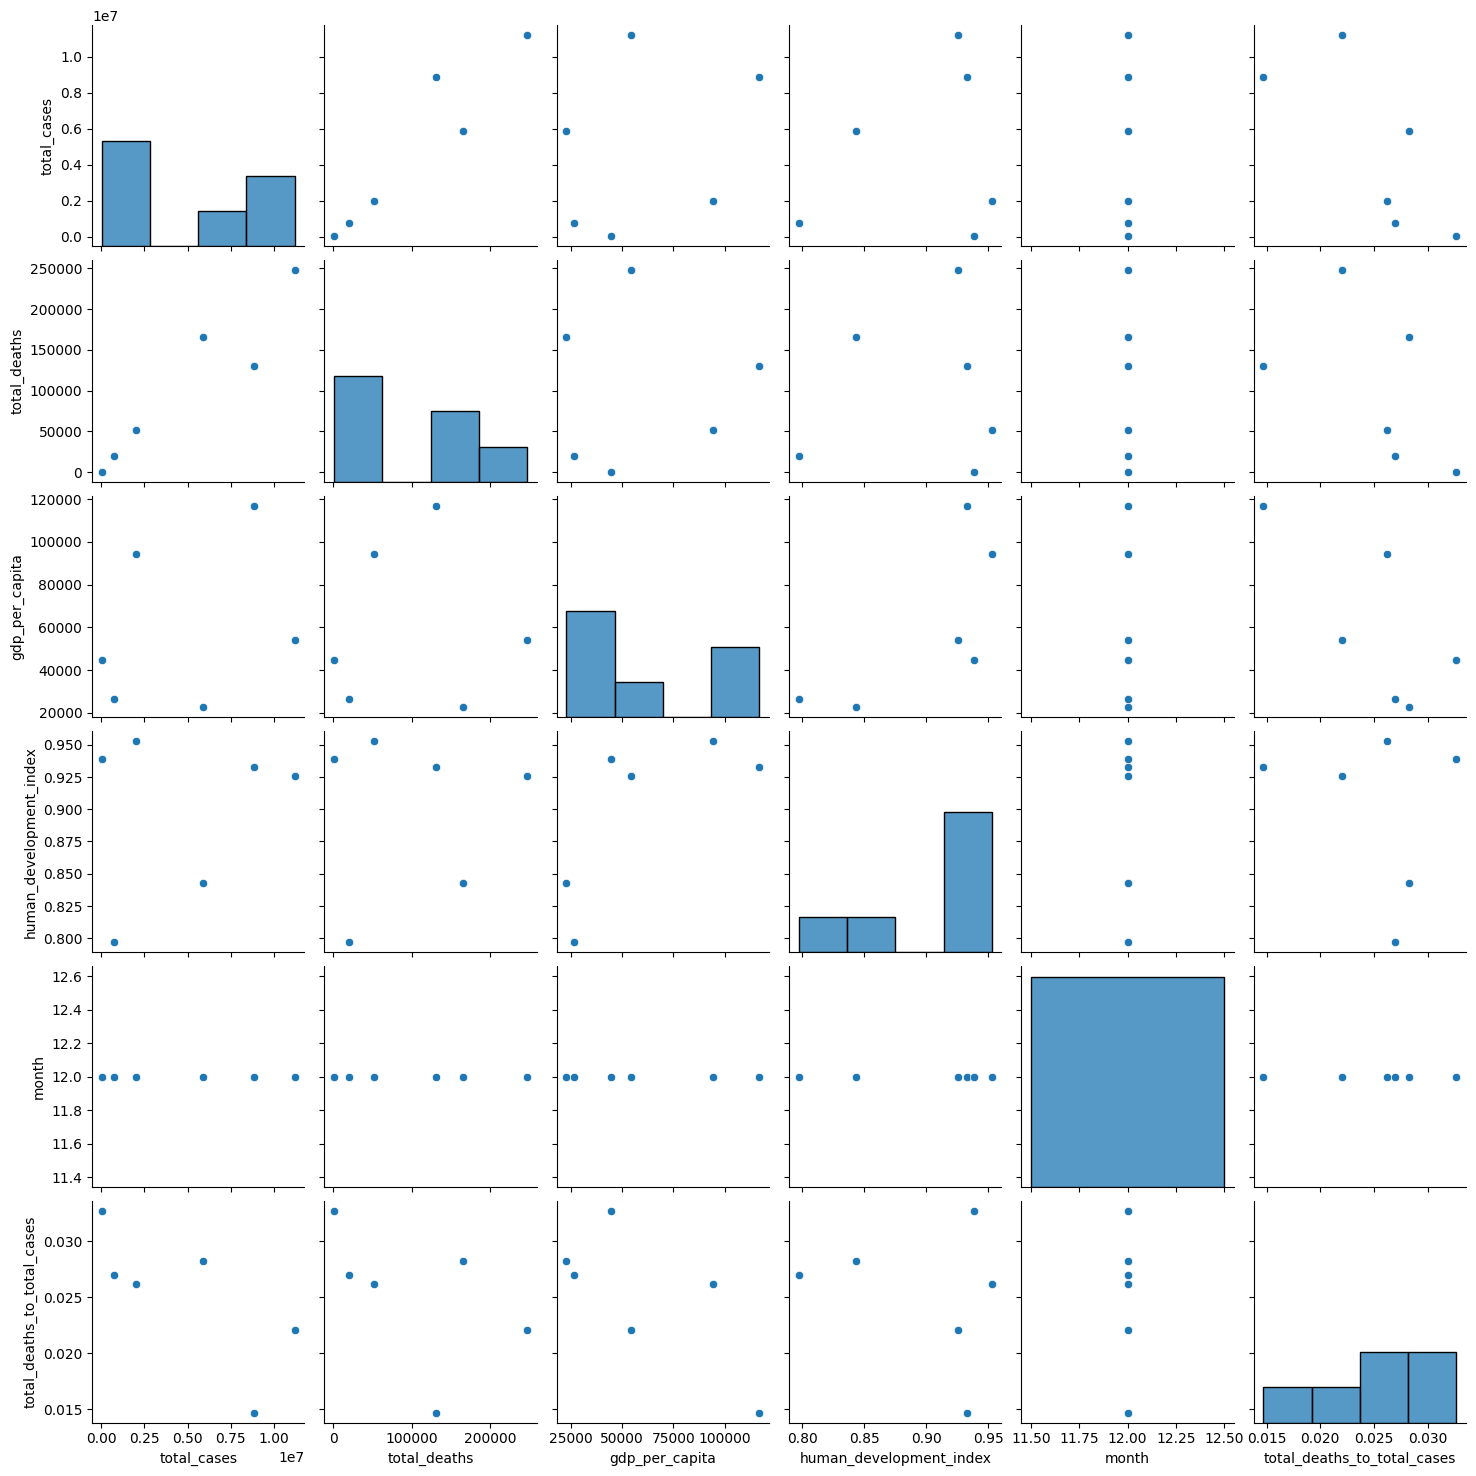

In [ ]:
# C. Pairplot on df_groupby
sns.pairplot(df_groupby)

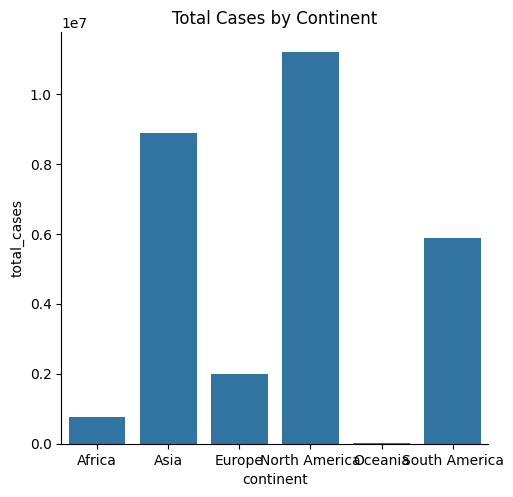

In [ ]:
# D. Bar plot of 'continent' vs 'total_cases'
sns.catplot(x='continent', y='total_cases', data=df_groupby, kind='bar')
plt.title("Total Cases by Continent")
plt.show()

## 11). Save the DataFrame

In [ ]:
df_groupby.to_csv('df_groupby.csv', index=False)